### Import thư viện

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
import cv2

In [3]:
DIR = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
# DIR = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset" # đường dẫn đến thư mục chứa dữ liệu
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [4]:
# tạo mảng chứa các lớp và đường dẫn đến các file ảnh RGB và ko đọc các file ảnh GT
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # nếu là file ảnh RGB
            if dirname.split()[-1]!='GT':                       # nếu không phải là file ảnh GT
                label.append(os.path.split(dirname)[-1])         # => lấy tên lớp
                path.append(os.path.join(dirname,filename))     # => lấy đường dẫn đến file ảnh
# tạo dataframe chứa đường dẫn đến ảnh và nhãn của ảnh
df = pd.DataFrame(columns=['path','label'])
df['path']=path # đường dẫn đến ảnh các loại cá
df['label']=label  # nhãn của ảnh các loại cá

In [5]:
# Xem kích thước của mỗi ảnh
PATH_1 = df['path'][0]
img = cv2.imread(PATH_1)
height, width, channels = img.shape
print('Chiều cao:', height)
print('Chiều rộng:', width)
print('Số kênh màu:', channels)

Chiều cao: 445
Chiều rộng: 590
Số kênh màu: 3


In [6]:
# Đếm số lượng ảnh của mỗi loại:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

In [7]:
# xem số nhãn của bài này
y = df['label'].unique()
y

array(['Black Sea Sprat', 'Gilt Head Bream', 'Hourse Mackerel',
       'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp',
       'Striped Red Mullet', 'Trout'], dtype=object)

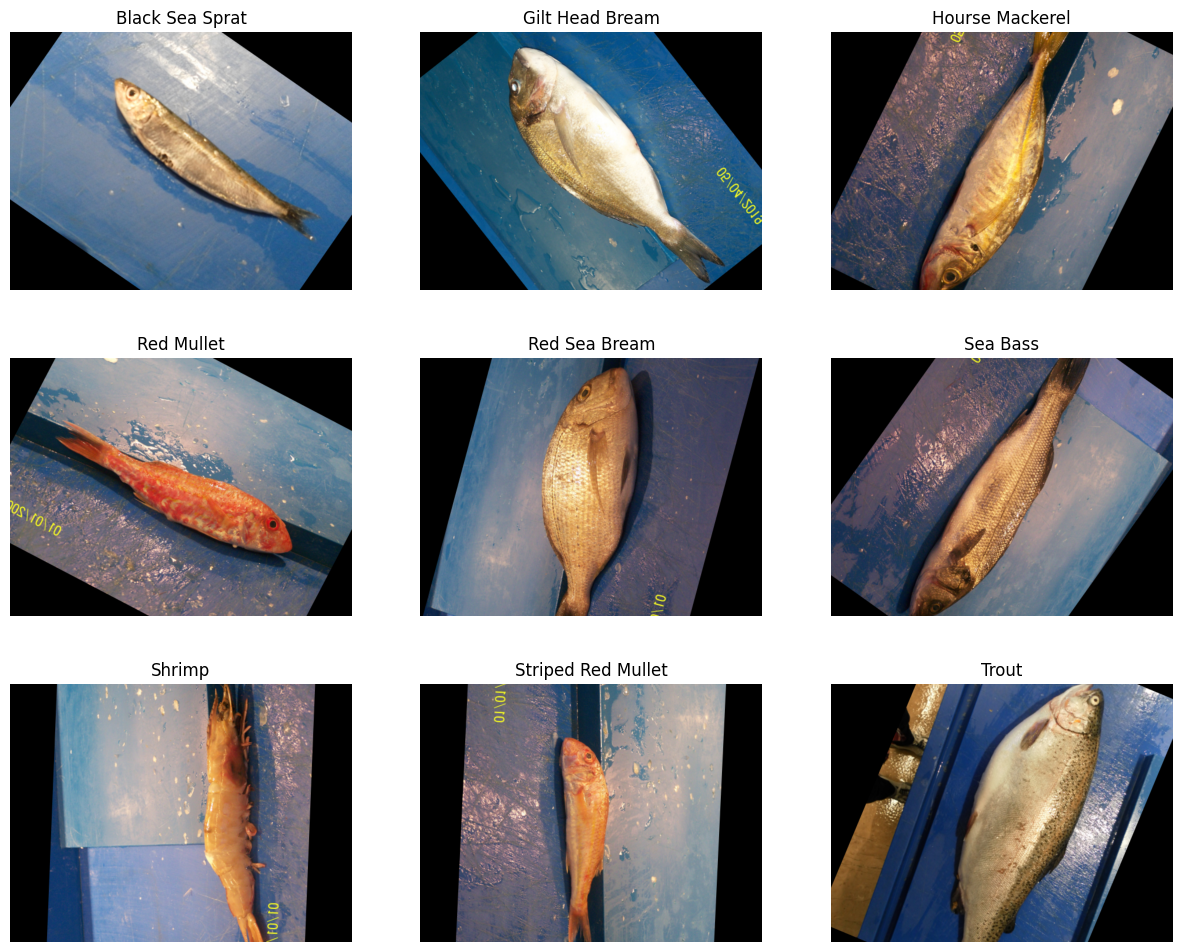

In [8]:
# xem ảnh RGB của 9 ảnh của các loại cá
idx = 0
plt.figure(figsize=(15,12))
for i in y:
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==i].iloc[1,0]))
    plt.title(i)
    plt.axis('off')
    idx+=1

### Thực hiện việc rút gọn số chiều dữ liệu và trực quan dữ liệu dưới dạng 2D và 3D

In [10]:
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# Đọc dữ liệu
X = []
for path in df['path']:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    X.append(img.flatten())
X = np.array(X)

label_dict ={'Black Sea Sprat': 0, 'Gilt Head Bream': 1, 'Hourse Mackerel': 2, 'Red Mullet': 3, 'Red Sea Bream': 4, 'Sea Bass': 5, 'Shrimp': 6, 'Striped Red Mullet': 7, 'Trout': 8}
labels = df['label'].map(label_dict)

In [14]:
labels

0       0
1       0
2       0
3       0
4       0
       ..
8995    8
8996    8
8997    8
8998    8
8999    8
Name: label, Length: 9000, dtype: int64

C:\Users\duyen\AppData\Local\Temp\ipykernel_17756\2593313852.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


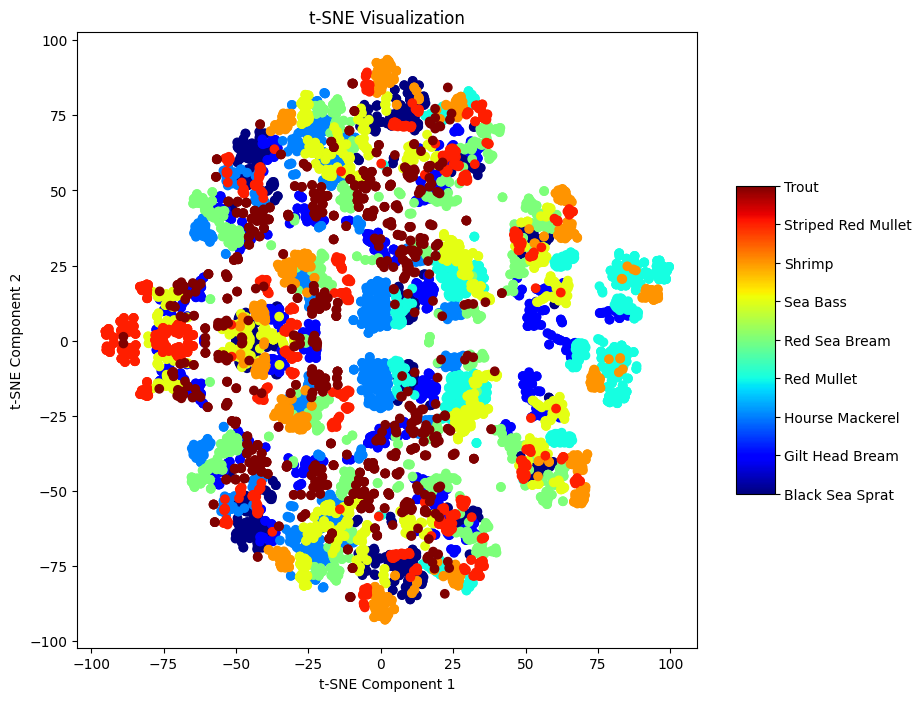

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X là ma trận dữ liệu (mỗi hàng là một vector dữ liệu)
# y là nhãn tương ứng với mỗi điểm dữ liệu
X_tsne = TSNE(n_components=2).fit_transform(X)

# Vẽ biểu đồ scatter plot của dữ liệu t-SNE
fig , ax = plt.subplots(figsize = (10,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,cmap='jet')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Visualization')
cbar = plt.colorbar(ax.collections[0], shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])
plt.show()


C:\Users\duyen\AppData\Local\Temp\ipykernel_17756\1864024978.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


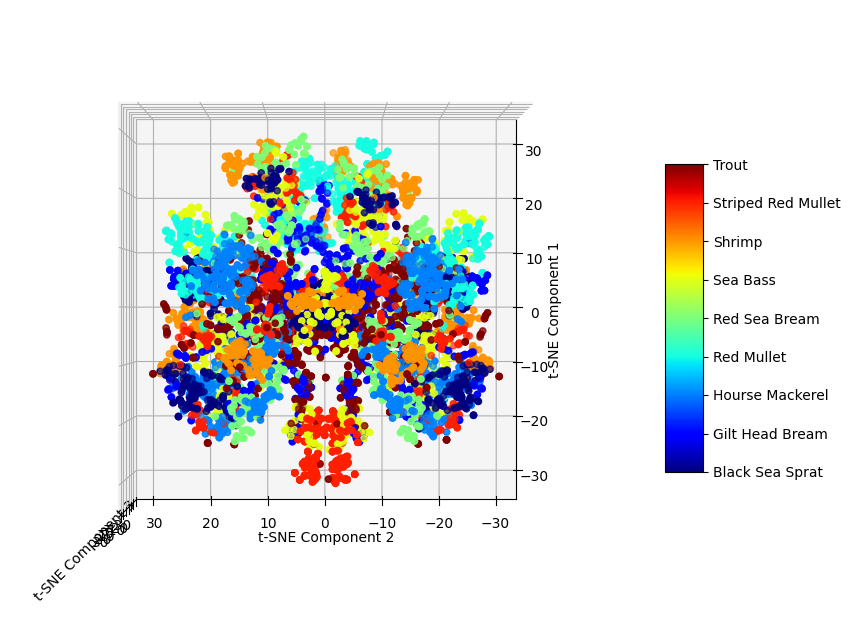

In [21]:
# Giảm số chiều về 3D
X_tsne3 = TSNE(n_components=3).fit_transform(X)

# Trực quan hóa dữ liệu dạng 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=labels, cmap='jet')
cbar = plt.colorbar(ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=labels, cmap='jet'), shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Xoay hình 3D
ax.view_init(elev=90, azim=180) # elev: độ nghiêng, azim: góc quay

plt.show()

C:\Users\vannt\AppData\Local\Temp\ipykernel_18196\3357653561.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


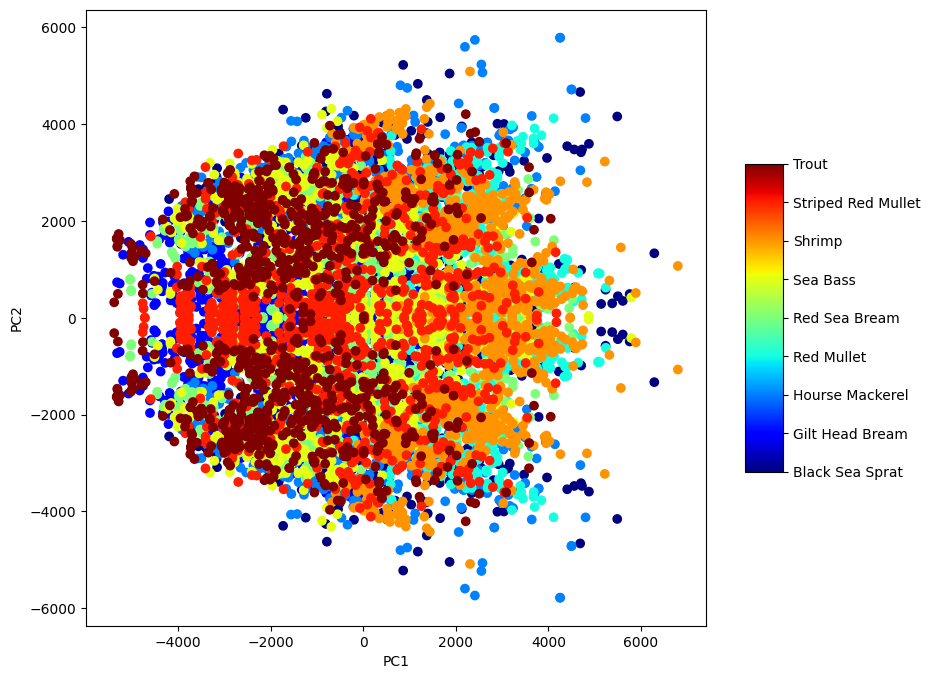

In [10]:
# giảm chiều về 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
# Trực quan hóa dữ liệu dạng 2D

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='jet')
cbar = plt.colorbar(ax.collections[0], shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

C:\Users\vannt\AppData\Local\Temp\ipykernel_18196\3310329386.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


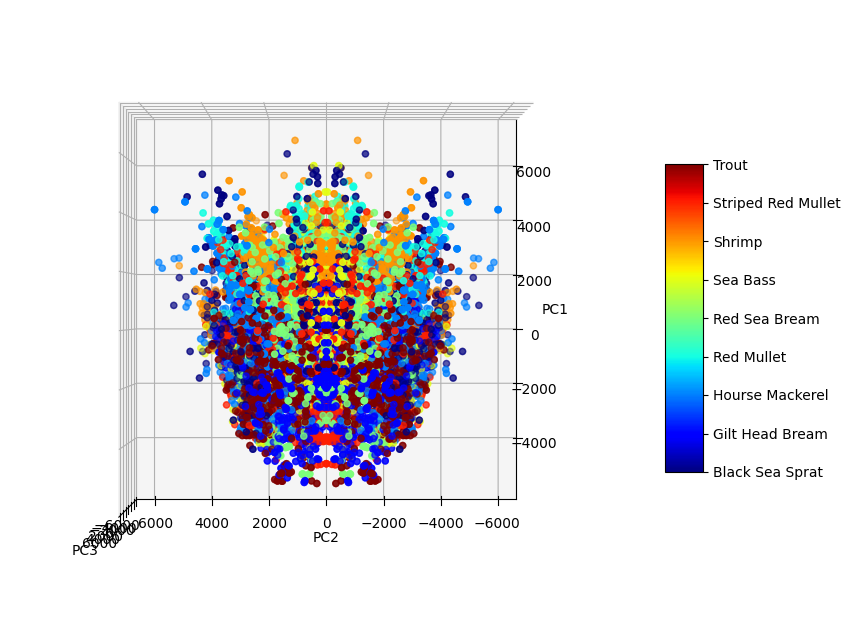

In [11]:
# Giảm số chiều về 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Trực quan hóa dữ liệu dạng 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='jet')
cbar = plt.colorbar(ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='jet'), shrink=0.5, aspect=8)
cbar.ax.set_yticklabels(['Black Sea Sprat', 'Gilt Head Bream','Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Xoay hình 3D
ax.view_init(elev=90, azim=180) # elev: độ nghiêng, azim: góc quay

plt.show()